# Capstone Project3-1

In [236]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [237]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
source = requests.get(url).text

### Make dataframe of Toronto

In [238]:
soup = BeautifulSoup(source, 'xml')
table=soup.find('table')

postcode = []
neighborhood_info = []
for row in table.find_all('td'):
    info = row.text.strip('\n').replace(']','') #

    info2 = info[3:]
    info3 = info2.strip(')') 
    info4 = info3.split('(') 

    postcode.append(info[0:3])
    neighborhood_info.append(info4)
    

neighborhood_info[0][-1] = 'Neighborhood' # change to american spelling
df1 = pd.DataFrame(postcode[1:], columns=['Postalcode'])
df2 = pd.DataFrame(neighborhood_info[1:], columns=['Borough','Neighborhood','None'])

df1["Borough"] = df2.loc[:,"Borough"]
df1["Neighborhood"] = df2.loc[:,"Neighborhood"]
df1.head()

,Postalcode,Borough,Neighborhood
0,M2A,Not assigned,None
1,M3A,North York,Parkwoods
2,M4A,North York,Victoria Village
3,M5A,Downtown Toronto,Regent Park / Harbourfront
4,M6A,North York,Lawrence Manor / Lawrence Heights


### Clean not assigned low

In [239]:
# Get names of indexes for which column Borough has value "Not assigned"
indexNames = df1[ df1['Borough'] =='Not assigned'].index

# Delete these row indexes from dataFrame
df1.drop(indexNames , inplace=True)
neighborhood_df = df1

### print the number of rows of your dataframe

In [240]:
print('After cleaning the DataFrame, its new shape is {}'.format(neighborhood_df.shape),'\n')
print('There are:')
print('  {} Postal codes'.format(neighborhood_df['Postalcode'].unique().shape[0]))
print('  {} Boroughs'.format(neighborhood_df['Borough'].unique().shape[0]))
print('  {} Neighborhoods'.format(neighborhood_df['Neighborhood'].unique().shape[0]))

After cleaning the DataFrame, its new shape is (103, 3) 

There are:
  103 Postal codes
  15 Boroughs
  103 Neighborhoods


### including coordinate information

In [225]:
coordinates_df = pd.read_csv('Geospatial_Coordinates.csv') # transform the csv file into a dataframe

print('The coordinates dataframe shape is', coordinates_df.shape)
coordinates_df.head()

The coordinates dataframe shape is (103, 3)


,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [231]:
postcodes_with_coordinates_df = neighborhood_df.join(coordinates_df.set_index('Postal Code'), on='Postalcode')

postcodes_with_coordinates_df.head(16)

,Postalcode,Borough,Neighborhood,Latitude,Longitude
1,M3A,North York,Parkwoods,43.753259,-79.329656
2,M4A,North York,Victoria Village,43.725882,-79.315572
3,M5A,Downtown Toronto,Regent Park / Harbourfront,43.654260,-79.360636
4,M6A,North York,Lawrence Manor / Lawrence Heights,43.718518,-79.464763
5,M7A,Queen's Park / Ontario Provincial Government,None,43.662301,-79.389494
7,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
8,M1B,Scarborough,Malvern / Rouge,43.806686,-79.194353
10,M3B,North York,Don Mills)North,43.745906,-79.352188
11,M4B,East York,Parkview Hill / Woodbine Gardens,43.706397,-79.309937
12,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [242]:
map = folium.Map(location=[43.6532,-79.3832], zoom_start=11)

for location in postcodes_with_coordinates_df.itertuples(): #iterate each row of the dataframe
    label = 'Postal Code: {};  Borough: {};  Neighborhoods: {}'.format(location[1], location[2], location[3])
    label = folium.Popup(label, parse_html=True)    
    folium.CircleMarker(
        [location[-2], location[-1]],
        radius=1,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map) 
    folium.Circle(
        radius=500,
        popup=label,
        location=[location[-2], location[-1]],
        color='#3186cc',
        fill=True,
        fill_color='#3186cc'
    ).add_to(map) 
    
map

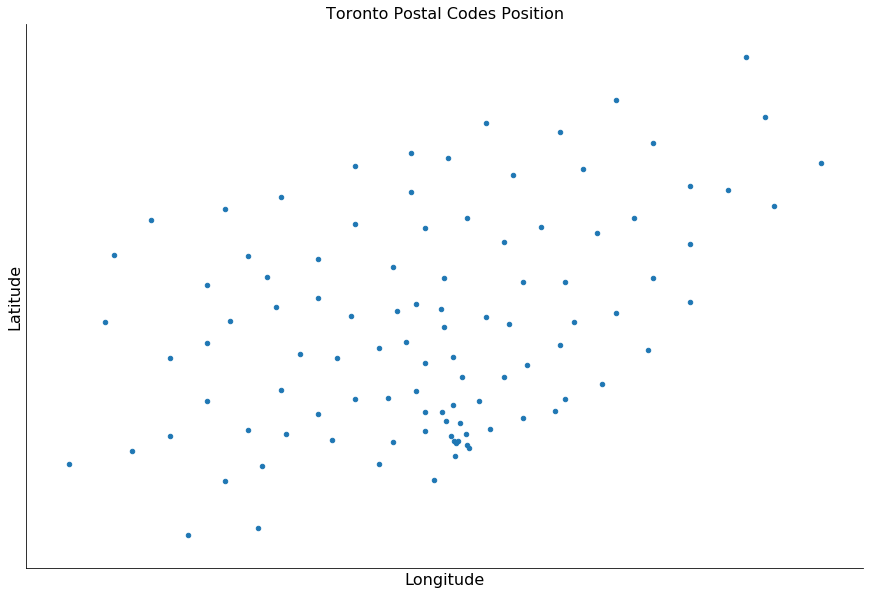

In [243]:
import matplotlib.pyplot as plt

X = postcodes_with_coordinates_df[['Longitude', 'Latitude']]

scatter_plot = X.plot.scatter(x='Longitude', 
               y='Latitude',  
               fontsize = 16,
               figsize=(15, 10))

scatter_plot.set_yticklabels([])
scatter_plot.set_xticklabels([])
scatter_plot.set_xticks([])
scatter_plot.set_yticks([])
scatter_plot.spines['top'].set_color(None)
scatter_plot.spines['right'].set_color(None)
plt.xlabel('Longitude', fontsize=16)
plt.ylabel('Latitude', fontsize=16)
scatter_plot.set_title('Toronto Postal Codes Position', fontsize=16)

scatter_plot.set_yticklabels(labels = 'Latitude', fontdict={'fontsize': 20})
plt.show()